In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
cifar10_dir = '../data/cifar10'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Training data shape:  (50000L, 32L, 32L, 3L)
Training labels shape:  (50000L,)
Test data shape:  (10000L, 32L, 32L, 3L)
Test labels shape:  (10000L,)


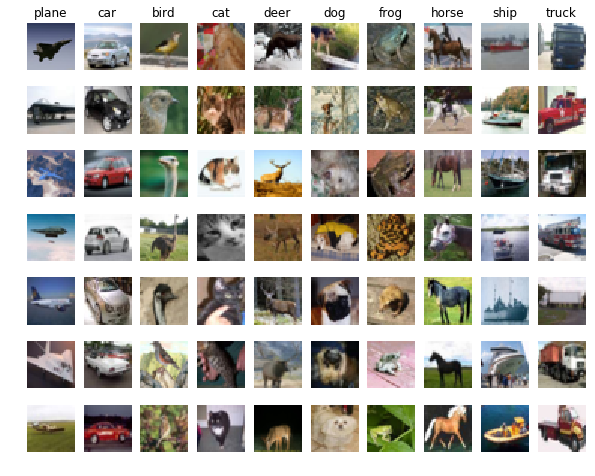

In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, i * num_classes + y + 1)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (49000L, 32L, 32L, 3L)
Train labels shape:  (49000L,)
Validation data shape:  (1000L, 32L, 32L, 3L)
Validation labels shape:  (1000L,)
Test data shape:  (1000L, 32L, 32L, 3L)
Test labels shape:  (1000L,)


In [5]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print 'Training data shape: ', X_train.shape
print 'Validation data shape: ', X_val.shape
print 'Test data shape: ', X_test.shape
print 'dev data shape: ', X_dev.shape

Training data shape:  (49000L, 3072L)
Validation data shape:  (1000L, 3072L)
Test data shape:  (1000L, 3072L)
dev data shape:  (500L, 3072L)


[ 130.64189796  135.98173469  132.47391837  130.05569388  135.34804082
  131.75402041  130.96055102  136.14328571  132.47636735  131.48467347]


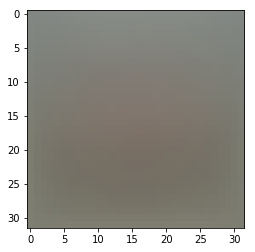

In [6]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print mean_image[:10] # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

In [7]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [8]:
X_train = np.hstack([X_train, np.ones([X_train.shape[0], 1])])  # 不可多次执行
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
print X_train.shape, X_val.shape, X_test.shape, X_dev.shape

(49000L, 3073L) (1000L, 3073L) (1000L, 3073L) (500L, 3073L)


In [9]:
from cs231n.classifiers.linear_svm import svm_loss_naive
import time

W = np.random.randn(3073, 10) * 0.0001
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.00001)
print 'loss: %f' % (loss, )

loss: 8.499682


In [10]:
from cs231n.gradient_check import grad_check_sparse

# Once you've implemented the gradient, recompute it with the code below
# and gradient check it with the function we provided for you

# Compute the loss and its gradient at W.
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

# do the gradient check once again with regularization turned on
# you didn't forget the regularization gradient did you?
loss, grad = svm_loss_naive(W, X_dev, y_dev, 1e2)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -4.645502 analytic: -4.645502, relative error: 6.000436e-12
numerical: -1.652957 analytic: -1.717508, relative error: 1.915202e-02
numerical: 29.546867 analytic: 29.546867, relative error: 9.133727e-12
numerical: -10.305502 analytic: -10.305502, relative error: 1.436935e-11
numerical: -1.646579 analytic: -1.646579, relative error: 5.591910e-11
numerical: 11.338980 analytic: 11.338980, relative error: 2.896012e-11
numerical: 0.546469 analytic: 0.546469, relative error: 2.144288e-10
numerical: -5.504714 analytic: -5.504714, relative error: 6.530991e-12
numerical: 21.795404 analytic: 21.795404, relative error: 7.996514e-12
numerical: 5.091316 analytic: 5.130145, relative error: 3.798846e-03
numerical: 8.370399 analytic: 8.370399, relative error: 2.855257e-11
numerical: 5.538228 analytic: 5.538228, relative error: 4.658815e-14
numerical: 14.597164 analytic: 14.597164, relative error: 2.472780e-12
numerical: -28.397945 analytic: -28.397945, relative error: 7.804651e-12
numerical:

In [11]:
from cs231n.classifiers.linear_svm import svm_loss_vectorized

tic = time.time()
loss_naive, grad = svm_loss_naive(W, X_dev, y_dev, 1e-4)
toc = time.time()
print 'Naive loss and gradient: computed in %fs' % (toc - tic)

tic = time.time()
loss_vectorized, grad = svm_loss_vectorized(W, X_dev, y_dev, 1e-4)
toc = time.time()
print 'Vectorized loss and gradient: computed in %fs' % (toc - tic)

# The losses should match but your vectorized implementation should be much faster.
print 'difference: %f' % (loss_naive - loss_vectorized)

Naive loss and gradient: computed in 0.116000s
Vectorized loss and gradient: computed in 0.003000s
difference: 0.000000


In [25]:
from cs231n.classifiers import LinearSVM

svm = LinearSVM()

tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=5e-4, num_iters=1500, verbose=True)
toc = time.time()
print 'That took %fs' % (toc - tic)

iteration 0 / 1500: loss 18.293639
iteration 100 / 1500: loss 9.754063
iteration 200 / 1500: loss 10.689043
iteration 300 / 1500: loss 10.470168
iteration 400 / 1500: loss 9.457744
iteration 500 / 1500: loss 7.535414
iteration 600 / 1500: loss 7.533555
iteration 700 / 1500: loss 7.271957
iteration 800 / 1500: loss 8.075633
iteration 900 / 1500: loss 7.501690
iteration 1000 / 1500: loss 6.296029
iteration 1100 / 1500: loss 6.473598
iteration 1200 / 1500: loss 7.565715
iteration 1300 / 1500: loss 6.742631
iteration 1400 / 1500: loss 8.214130
That took 6.259000s


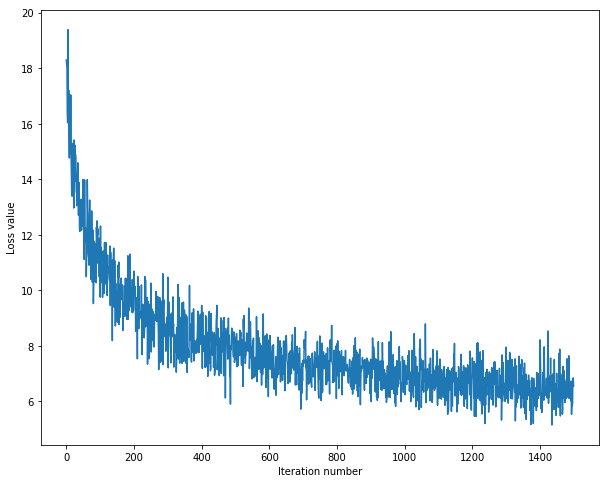

In [26]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [28]:
y_train_pred = svm.predict(X_train)
print 'training accuracy: %f' % (np.mean(y_train == y_train_pred))

y_val_pred = svm.predict(X_val)
print 'validate accuracy: %f' % (np.mean(y_val == y_val_pred))

training accuracy: 0.307653
validate accuracy: 0.300000


In [86]:
learning_rates = [1.4e-7, 1.5e-7, 1.6e-7]
regularization_strengths = [(1 + i * 0.1) * 1e4 for i in range(-3, 3)] + [(2 + i * 0.1) * 1e4 for i in range(-3, 3)]
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.

for rs in regularization_strengths:
    for lr in learning_rates:
        svm = LinearSVM()
        loss_hist = svm.train(X_train, y_train, lr, rs, num_iters=3000)
        y_train_pred = svm.predict(X_train)
        train_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val)
        val_accuracy = np.mean(y_val == y_val_pred)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm           
        results[(lr,rs)] = train_accuracy, val_accuracy

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

lr 1.400000e-07 reg 7.000000e+03 train accuracy: 0.400510 val accuracy: 0.391000
lr 1.400000e-07 reg 8.000000e+03 train accuracy: 0.396367 val accuracy: 0.385000
lr 1.400000e-07 reg 9.000000e+03 train accuracy: 0.392367 val accuracy: 0.394000
lr 1.400000e-07 reg 1.000000e+04 train accuracy: 0.389592 val accuracy: 0.387000
lr 1.400000e-07 reg 1.100000e+04 train accuracy: 0.392102 val accuracy: 0.380000
lr 1.400000e-07 reg 1.200000e+04 train accuracy: 0.380898 val accuracy: 0.391000
lr 1.400000e-07 reg 1.700000e+04 train accuracy: 0.384633 val accuracy: 0.379000
lr 1.400000e-07 reg 1.800000e+04 train accuracy: 0.383816 val accuracy: 0.405000
lr 1.400000e-07 reg 1.900000e+04 train accuracy: 0.382776 val accuracy: 0.393000
lr 1.400000e-07 reg 2.000000e+04 train accuracy: 0.379388 val accuracy: 0.375000
lr 1.400000e-07 reg 2.100000e+04 train accuracy: 0.379469 val accuracy: 0.396000
lr 1.400000e-07 reg 2.200000e+04 train accuracy: 0.376776 val accuracy: 0.384000
lr 1.500000e-07 reg 7.000000

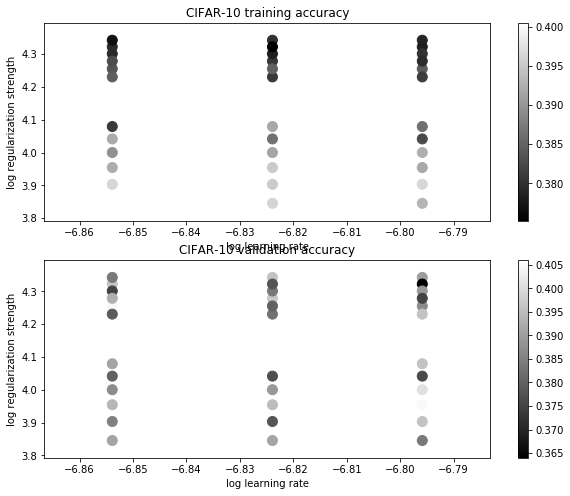

In [87]:
# Visualize the cross-validation results
import math
# print results
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]
# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [88]:
# Evaluate the best svm on test set
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print 'linear SVM on raw pixels final test set accuracy: %f' % test_accuracy

linear SVM on raw pixels final test set accuracy: 0.389000


(3073L, 10L)


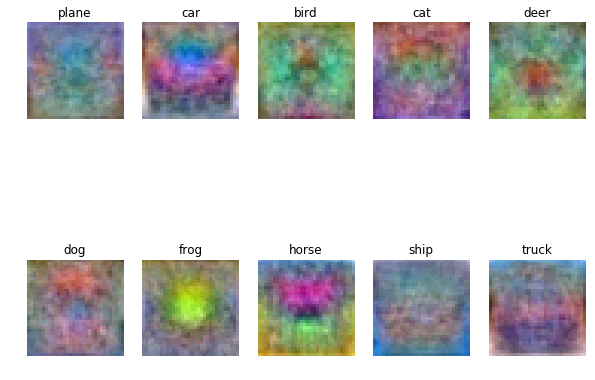

In [92]:
print best_svm.W.shape
w = best_svm.W[:-1, :]
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
    plt.subplot(2, 5, i + 1)
    wimg = 255 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])